# Setting Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV

In [2]:
df_tweets = pd.read_csv('./tfidf_tweets.csv')
df_tweets.head()

,sentimen,0,1,2,3,4,5,6,7,8,...,4478,4479,4480,4481,4482,4483,4484,4485,4486,4487
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Fiture Selection

In [3]:
X = df_tweets.iloc[:,1:]
y = df_tweets.sentimen

# Data Modeling

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10) 

In [5]:
X_train, X_test

(        0    1    2    3    4    5    6    7    8         9  ...  4478  4479  \
 2331  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   0.0   0.0   
 2558  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   0.0   0.0   
 1234  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   0.0   0.0   
 1804  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.239931  ...   0.0   0.0   
 2165  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   0.0   0.0   
 ...   ...  ...  ...  ...  ...  ...  ...  ...  ...       ...  ...   ...   ...   
 3441  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   0.0   0.0   
 1344  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   0.0   0.0   
 527   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   0.0   0.0   
 3197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   0.0   0.0   
 1289  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  ...   0.0   0.0   
 
       4480  4481  4482  4

In [6]:

scores = ['precision', 'recall']

def run_tuning(model, hyperparameters, scores, X_train, y_train, X_test, y_test):
    for score in scores:
        print("Tuning hyperparameter for %s" % score)
        print()

        clf = GridSearchCV(model, hyperparameters, scoring='%s_macro' % score, cv=None, n_jobs=-1)
        clf.fit(X_train, y_train)

        print('Best parameter set found: ')
        print()
        print(clf.best_params_)
        print()

        print('Grid scores in process: ')
        print()
        means = clf.cv_results_['mean_test_score']

        for mean, params in zip(means, clf.cv_results_['params']):
            print('%0.3f for %r' % (mean, params))

        print()
        print()
        print('Detail Classification Report')
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        print()
     

In [7]:

hyperparameters = {
    'bootstrap': [True],
    'max_depth': [10, 100],
    'max_features': [2, 3, 'auto'],
    'n_estimators': [10, 100, 200]}

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2901, 4488)
(726, 4488)
(2901,)
(726,)


In [9]:
rfc = RandomForestClassifier(n_jobs=-1)
run_tuning(rfc, hyperparameters, scores, X_train, y_train, X_test, y_test)

Tuning hyperparameter for precision

Best parameter set found: 

{'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'n_estimators': 200}

Grid scores in process: 

0.560 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'n_estimators': 10}
0.640 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'n_estimators': 100}
0.688 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'n_estimators': 200}
0.512 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 10}
0.657 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 100}
0.685 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 200}
0.563 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}
0.624 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
0.639 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
0.658 for {'bootstrap': True, 'max_

In [10]:
rf = RandomForestClassifier(max_depth=100, max_features=2, bootstrap=True, n_estimators=200 )
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_features=2, n_estimators=200)

In [11]:
y_pred = rf.predict(X_test)

In [12]:
len(y_pred), len(y_test), y_train

(726,
 726,
 2331    1
 2558    2
 1234    1
 1804    2
 2165    0
        ..
 3441    1
 1344    2
 527     1
 3197    0
 1289    1
 Name: sentimen, Length: 2901, dtype: int64)

# Evaluate

## Confusion matrix

In [13]:
# buat confusion matrix antara Test dan Prediksi
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,210,17,5
1,15,212,14
2,10,26,217


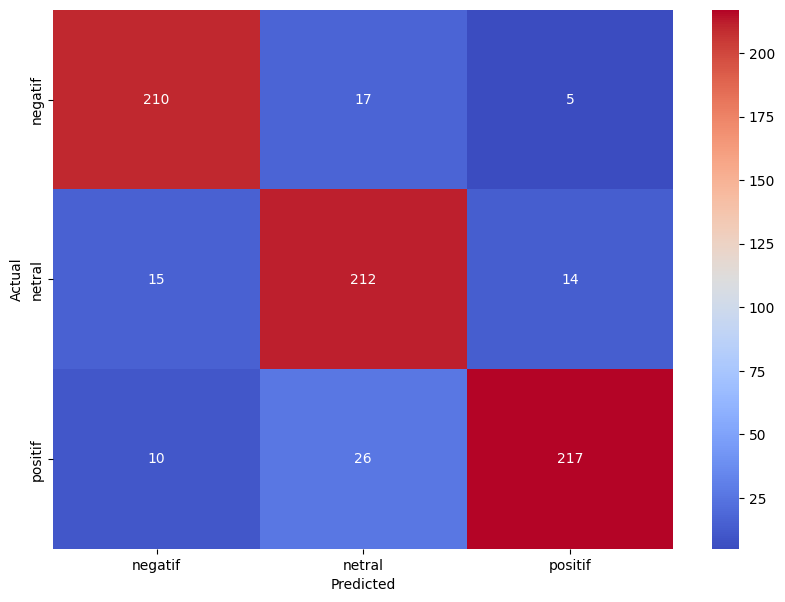

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Accuracy, Recall, Precision, F1 Score

In [15]:
report = classification_report(y_test, y_pred)
print(report)

# Hitung dan cetak accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       232
           1       0.83      0.88      0.85       241
           2       0.92      0.86      0.89       253

    accuracy                           0.88       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.88      0.88      0.88       726

Accuracy: 0.8801652892561983
